# LabelPropagation with MOON dataset
## 필요한 패키지 부르기

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report

In [2]:
# load data
data = datasets.make_moons(n_samples=(5000, 2500), noise=0.2, random_state=0)

In [3]:
data

(array([[ 0.83532604,  0.85137317],
        [ 0.0698338 ,  0.18867745],
        [ 1.76362043,  0.21321375],
        ...,
        [ 0.56010227,  0.87816576],
        [-0.16450357,  0.96825635],
        [-0.37642917,  1.059793  ]]),
 array([0, 1, 1, ..., 0, 0, 0]))

In [4]:
X = pd.DataFrame(data[0], columns=['0', '1'])
y = pd.DataFrame(data[1], columns=['label'])

data = pd.concat([X, y], axis=1)

In [5]:
X

0         1
0     0.835326  0.851373
1     0.069834  0.188677
2     1.763620  0.213214
3     1.505715 -0.681761
4    -0.756360  0.512443
...        ...       ...
7495 -1.189472  0.085934
7496 -0.463431  0.868338
7497  0.560102  0.878166
7498 -0.164504  0.968256
7499 -0.376429  1.059793

[7500 rows x 2 columns]

In [6]:
y

label
0         0
1         1
2         1
3         1
4         0
...     ...
7495      0
7496      0
7497      0
7498      0
7499      0

[7500 rows x 1 columns]

In [7]:
data

0         1  label
0     0.835326  0.851373      0
1     0.069834  0.188677      1
2     1.763620  0.213214      1
3     1.505715 -0.681761      1
4    -0.756360  0.512443      0
...        ...       ...    ...
7495 -1.189472  0.085934      0
7496 -0.463431  0.868338      0
7497  0.560102  0.878166      0
7498 -0.164504  0.968256      0
7499 -0.376429  1.059793      0

[7500 rows x 3 columns]

In [8]:
# Split train dataset & test dataset
train, test = '''train_test_split'''

In [9]:
X_train, y_train = train.drop(['label'], axis=1), train.loc[:, 'label']
X_test, y_test = test.drop(['label'], axis=1), test.loc[:, 'label']
del(train, test)

In [10]:
# Check indices of train dataset
# Shuffle them
indices_train = list(X_train.index)
random.shuffle(indices_train)

In [11]:
# Generate unlabel data
y_train_true = y_train.copy()

In [12]:
unlabeled_ratio = 0.2
indices_unlabeled = indices_train[int(len(indices_train)*(1-unlabeled_ratio)):]

In [13]:
print("The number of real train data: %d \n the number of unlabeled data: %d"%(
    len(indices_train), len(indices_unlabeled)
))

The number of real train data: 6000 
 the number of unlabeled data: 1200


In [14]:
'''unlabeled data 레이블 -1로 지정하기'''

1328    0
2368    0
4113    1
1670    1
2364   -1
       ..
4931    0
3264   -1
1653    0
2607   -1
2732    0
Name: label, Length: 6000, dtype: int64

In [15]:
# Min Max scaling
scaler = MinMaxScaler().fit(X_train.values)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [16]:
# Four dimension to Two dimension using t-SNE
# Visualize real train dataset and unlabeled data
X_embedded = X_train.copy()

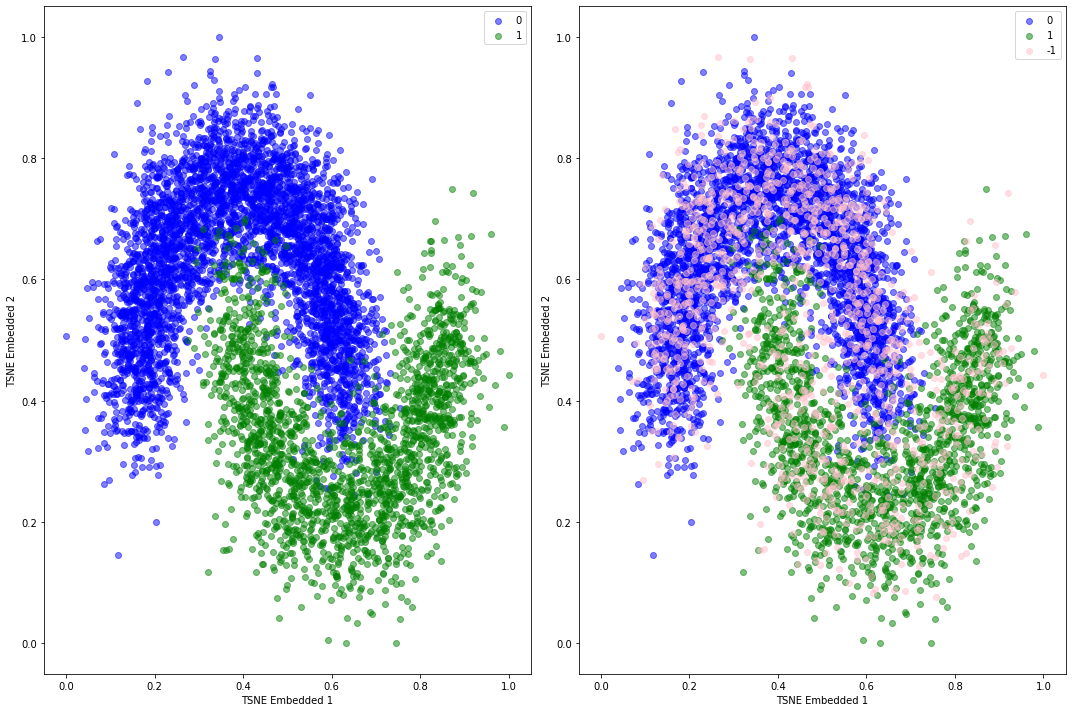

In [17]:
colors = ['b', 'g', 'pink']
legends = ['0', '1',  '-1']
plt.figure(figsize=(15, 10))
plt.subplot(121)
for c in [0, 1]:
    tmp_y = y_train_true[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[c], label=legends[c])
plt.xlabel('Embedded 1')
plt.ylabel('Embedded 2')
plt.legend()
plt.tight_layout()

plt.subplot(122)
for c in [0, 1, -1]:
    tmp_y = y_train[y_train==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    if c == -1:
        plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[-1], label=legends[-1])
    else:
        plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[c], label=legends[c])
plt.xlabel('Embedded 1')
plt.ylabel('Embedded 2')
plt.legend()
plt.tight_layout()

plt.show()

In [18]:
# Build LabelPropagation model
model = LabelPropagation(
    kernel='''커널 설정''',
    n_neighbors='''인접 데이터 수''',
    max_iter=100,
    tol=1e-3,
    n_jobs=-1
)
model.fit(X_train.values, y_train.values)

LabelPropagation(max_iter=100, n_jobs=-1, n_neighbors=25)

In [19]:
# Evaluate prediction results
y_train_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_test_pred = pd.Series(model.predict(X_test), index=y_test.index)

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  warnings.warn(


In [20]:
print(classification_report(y_train_true, y_train_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4010
           1       0.92      0.79      0.85      1990

    accuracy                           0.91      6000
   macro avg       0.91      0.88      0.89      6000
weighted avg       0.91      0.91      0.91      6000



In [21]:
print(classification_report(y_test, y_test, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       510

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



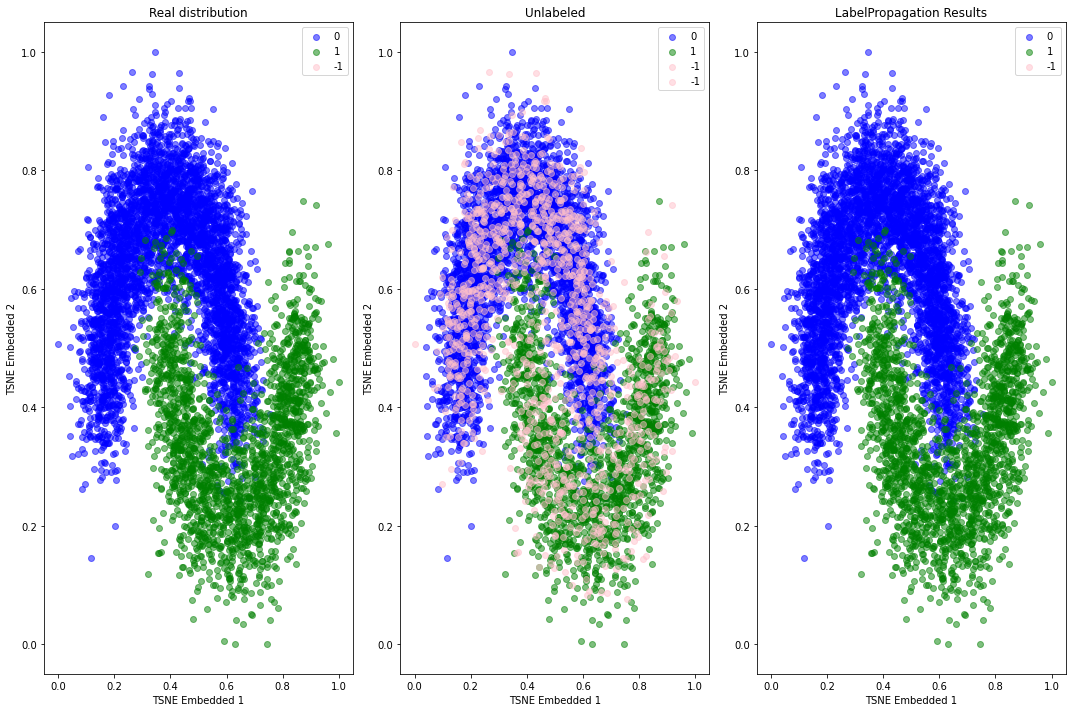

In [22]:
# Visualize results of labelpropagation
plt.figure(figsize=(10, 15))
plt.subplot(131)
for c in [0, 1, 2]:
    tmp_y = y_train_true[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[c], label=legends[c])
plt.xlabel('Embedded 1')
plt.ylabel('Embedded 2')
plt.title('Real distribution')
plt.legend()
plt.tight_layout()

plt.subplot(132)
for c in [0, 1, 2, -1]:
    tmp_y = y_train[y_train==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    if c == -1:
        plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[-1], label=legends[-1])
    else:
        plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[c], label=legends[c])
plt.xlabel('Embedded 1')
plt.ylabel('Embedded 2')
plt.title('Unlabeled')
plt.legend()
plt.tight_layout()

plt.subplot(133)
for c in [0, 1, 2]:
    tmp_y = y_train_pred[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x.iloc[:, 0], tmp_x.iloc[:, 1], alpha=0.5, color=colors[c], label=legends[c])
plt.xlabel('Embedded 1')
plt.ylabel('Embedded 2')
plt.title('LabelPropagation Results')
plt.legend()
plt.tight_layout()

plt.show()